<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
# Code hider, source: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/
from IPython.display import HTML

HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

In [2]:
%%javascript
// ToC script
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from feature_extract import *



In [4]:
plt.rcParams["figure.figsize"] = [12,6]
pd.options.display.float_format = '{:,.3f}'.format

# Zimmerman paper notes

[Min et al: Mining Smartphone Data to Classify Life-Facets of Social Relationships](https://dl.acm.org/citation.cfm?id=2441810)

[pdf](https://disco.ethz.ch/courses/fs14/seminar/paper/Philipp/4.pdf)


## Mobile communication pattern features

- intensity and regularity
    - \# days {call, sms} / days logged
    - {avg, std} {out, in} {call, sms} per day
- temporal tendency
    - \# {call, sms} at {time of day, day of week} / total
- channel selection
    - out comm / total comm
    - \# calls / total comm
- avoidance
    - missed calls / {out, in} calls
    - in SMS / out SMS
    
**note**: total in this context is in terms of individual  

In [5]:
# load data
comm_df = pickle.load(open("../data/top_5_contacts_cal.df", "rb"))
emm_df = pickle.load(open("../data/emm_raw.df", "rb"))

In [6]:
# build features
comm_features = comm_feature_extract(comm_df, emm_df)

/mnt/c/Users/Tony Liu/Documents/Github/relationship-prediction/feature_extract/feature_extract.py:162: RuntimeWarning: invalid value encountered in sqrt
  temp_df[std_name] = np.sqrt(temp_df['total_ssum'] / (temp_df['total_days'] - 1))


In [7]:
# for unit testing
# test_df = comm_df.loc[comm_df['combined_hash'].isin(['1002060a7f4fe408f8137f12982e5d64cf34693',
#  '10413044ad5f1183e38f5ddf17259326e976231'])]

# display(test_df)
# pickle.dump(test_df, open('test_comm.df', 'wb'), -1)

# emm_df.head()

# test_emm = emm_df.loc[emm_df['pid'].isin(['1002060', '1041304'])]

# pickle.dump(test_emm, open("test_emm.df", "wb"), -1)

# Regularity: comm days / total days ratio

Features:
- `total_calls`
- `total_sms`
- `total_call_days`
- `total_sms_days`
- `reg_call`: regularity of calls, total_call_days / total_days
- `reg_sms`: regularity of sms, total_sms_days / total_days
- `reg_comm`: regularity of communication, total_comm_days / total_days

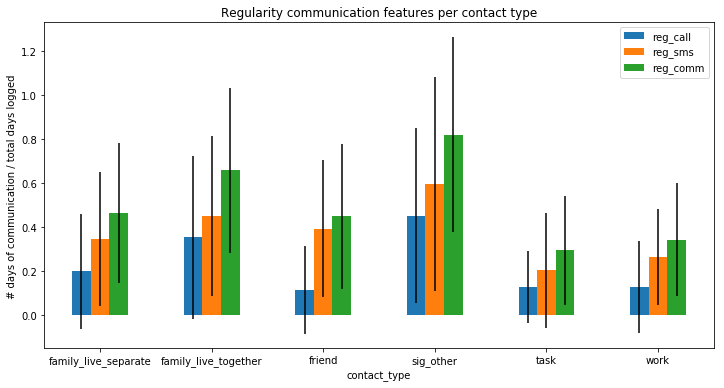

In [8]:
reg_feature_mean = comm_features.groupby('contact_type')[['reg_call', 'reg_sms', 'reg_comm']].mean()
reg_feature_std = comm_features.groupby('contact_type')[['reg_call', 'reg_sms', 'reg_comm']].std()

reg_feature_mean.plot.bar(rot=0, yerr=reg_feature_std)
plt.title("Regularity communication features per contact type")
plt.ylabel("# days of communication / total days logged")
plt.show()

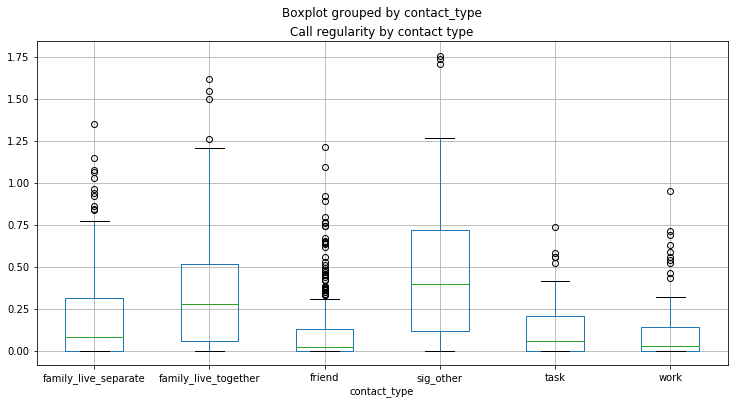

In [9]:
comm_features.boxplot(column='reg_call', by='contact_type')
plt.title("Call regularity by contact type")
plt.show()

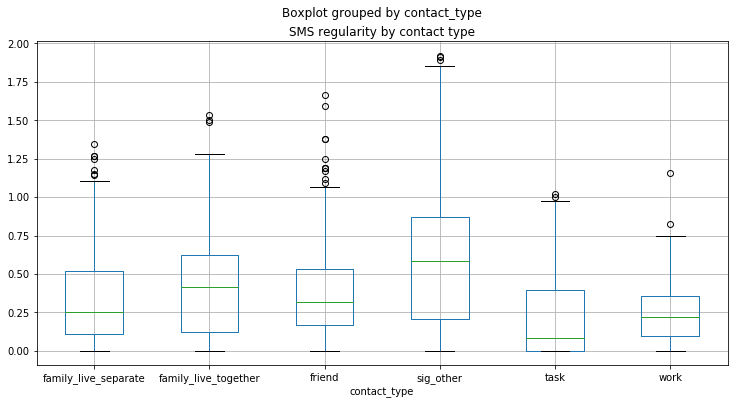

In [10]:
comm_features.boxplot(column='reg_sms', by='contact_type')
plt.title("SMS regularity by contact type")
plt.show()

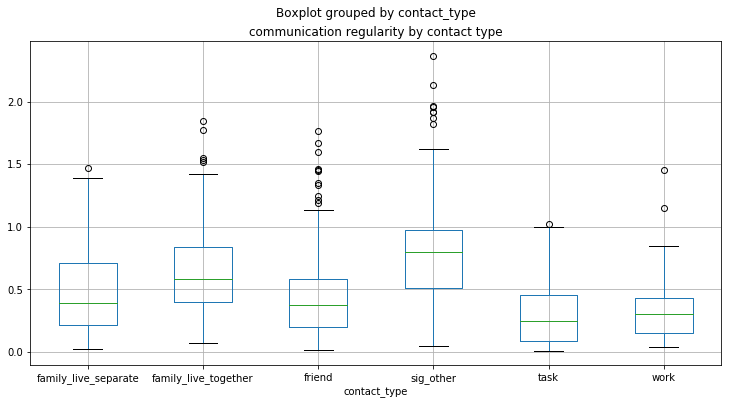

In [11]:
comm_features.boxplot(column='reg_comm', by='contact_type')
plt.title("communication regularity by contact type")
plt.show()

# Temporal tendency: time of day, day of week

Features:
- `time_of_day_{0-5}_{call, sms}`: # {call, sms} at time of day / total
- `day_{0-6}_{call, sms}`: # {call, sms} at day of week / total

## Temporal tendency: SMS

In [12]:
sms_features = comm_features.loc[comm_features['total_sms'] > 0]
time_of_day_sms = ["time_of_day_{}_sms".format(x) for x in range(6)]
day_of_week_sms = ["day_{}_sms".format(x) for x in range(7)]

time_day_sms_mean = sms_features.groupby('contact_type')[time_of_day_sms].mean().T
time_day_sms_std = sms_features.groupby('contact_type')[time_of_day_sms].std()
display(time_day_sms_mean)

day_wk_sms_mean = sms_features.groupby('contact_type')[day_of_week_sms].mean().T
day_wk_sms_std = sms_features.groupby('contact_type')[day_of_week_sms].std()

display(day_wk_sms_mean)

contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
time_of_day_0_sms,0.025,0.042,0.041,0.056,0.032,0.037
time_of_day_1_sms,0.025,0.011,0.028,0.016,0.019,0.016
time_of_day_2_sms,0.200,0.152,0.180,0.160,0.266,0.260
time_of_day_3_sms,0.270,0.300,0.253,0.269,0.310,0.276
time_of_day_4_sms,0.280,0.310,0.288,0.303,0.253,0.301
time_of_day_5_sms,0.201,0.185,0.210,0.195,0.120,0.110


contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
day_0_sms,0.121,0.142,0.140,0.163,0.159,0.181
day_1_sms,0.131,0.165,0.133,0.147,0.166,0.133
day_2_sms,0.138,0.134,0.143,0.157,0.170,0.187
day_3_sms,0.146,0.132,0.153,0.144,0.125,0.134
day_4_sms,0.175,0.171,0.164,0.174,0.155,0.166
day_5_sms,0.152,0.142,0.141,0.115,0.135,0.110
day_6_sms,0.137,0.114,0.127,0.099,0.090,0.089


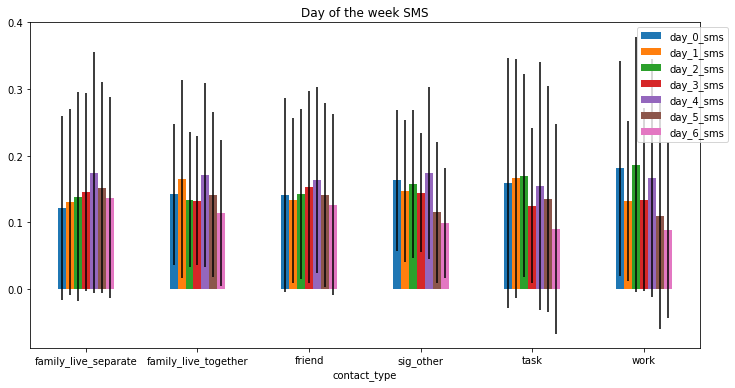

In [13]:
day_wk_sms_mean.T.plot.bar(rot=0, yerr=day_wk_sms_std)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Day of the week SMS")
plt.show()

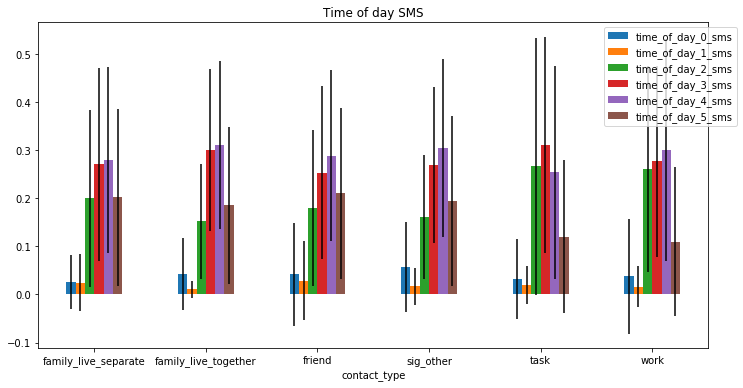

In [14]:
time_day_sms_mean.T.plot.bar(rot=0, yerr=time_day_sms_std)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Time of day SMS")
plt.show()

## Temporal tendency: calls

In [15]:
call_features = comm_features.loc[comm_features['total_calls'] > 0]
time_of_day_calls = ["time_of_day_{}_calls".format(x) for x in range(6)]
day_of_week_calls = ["day_{}_calls".format(x) for x in range(7)]

time_day_calls_mean = call_features.groupby('contact_type')[time_of_day_calls].mean().T
time_day_calls_std = call_features.groupby('contact_type')[time_of_day_calls].std()

display(time_day_calls_mean)

day_wk_calls_mean = call_features.groupby('contact_type')[day_of_week_calls].mean().T
day_wk_calls_std = call_features.groupby('contact_type')[day_of_week_calls].std()

display(day_wk_calls_mean)

contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
time_of_day_0_calls,0.008,0.018,0.032,0.034,0.022,0.036
time_of_day_1_calls,0.019,0.028,0.018,0.019,0.010,0.055
time_of_day_2_calls,0.176,0.149,0.143,0.152,0.247,0.320
time_of_day_3_calls,0.313,0.272,0.241,0.259,0.332,0.302
time_of_day_4_calls,0.346,0.388,0.364,0.358,0.249,0.247
time_of_day_5_calls,0.138,0.145,0.202,0.178,0.139,0.041


contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
day_0_calls,0.121,0.179,0.129,0.132,0.118,0.146
day_1_calls,0.134,0.130,0.092,0.174,0.198,0.129
day_2_calls,0.148,0.154,0.160,0.158,0.191,0.293
day_3_calls,0.147,0.132,0.161,0.149,0.144,0.106
day_4_calls,0.161,0.144,0.164,0.165,0.157,0.184
day_5_calls,0.154,0.140,0.168,0.124,0.090,0.049
day_6_calls,0.134,0.121,0.126,0.097,0.102,0.092


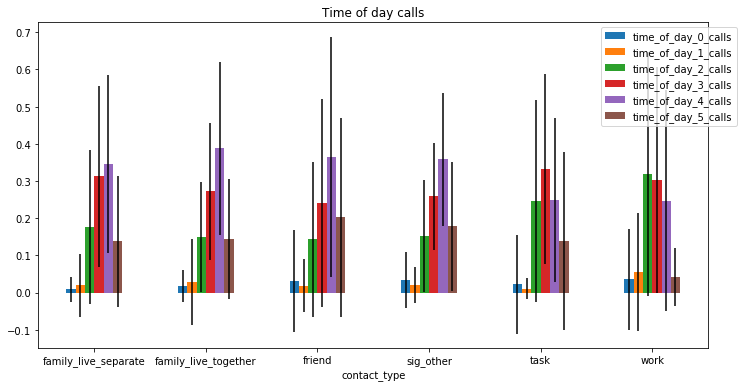

In [16]:
time_day_calls_mean.T.plot.bar(rot=0, yerr=time_day_calls_std)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Time of day calls")
plt.show()

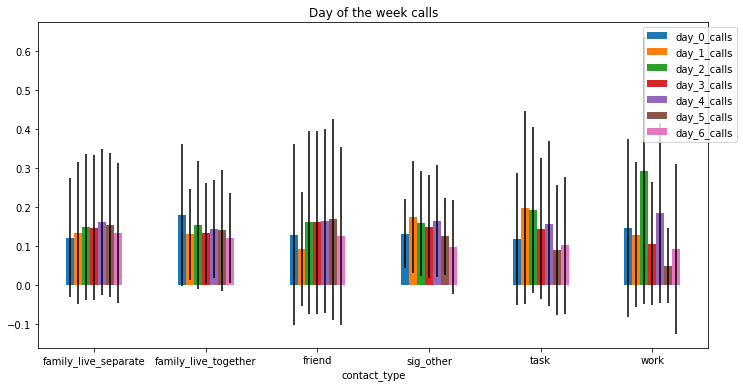

In [17]:
day_wk_calls_mean.T.plot.bar(rot=0, yerr=day_wk_calls_std)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Day of the week calls")
plt.show()

# Channel selection: outgoing ratio, call/text ratio

Features created:
- `out_comm`: out comm / total comm
- `call_tendency`: call count / total comm

Note on interpretation: a lower call tendency indicates a higher text tendency, and vice versa

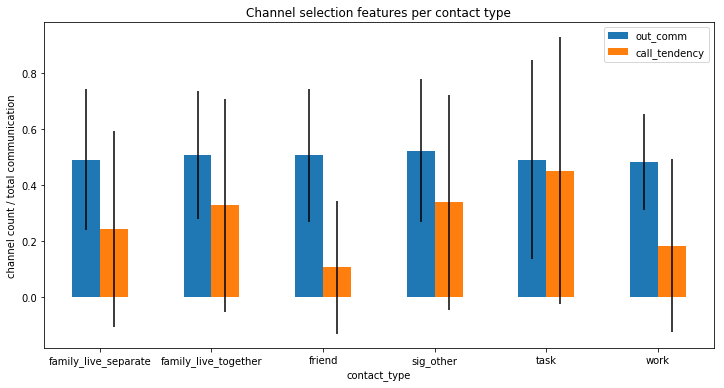

In [18]:
channel_select_mean = comm_features.groupby('contact_type')[['out_comm', 'call_tendency']].mean()
channel_select_std = comm_features.groupby('contact_type')[['out_comm', 'call_tendency']].std()
channel_select_mean.plot.bar(rot=0, yerr=channel_select_std)
plt.title("Channel selection features per contact type")
plt.ylabel("channel count / total communication")
plt.show()

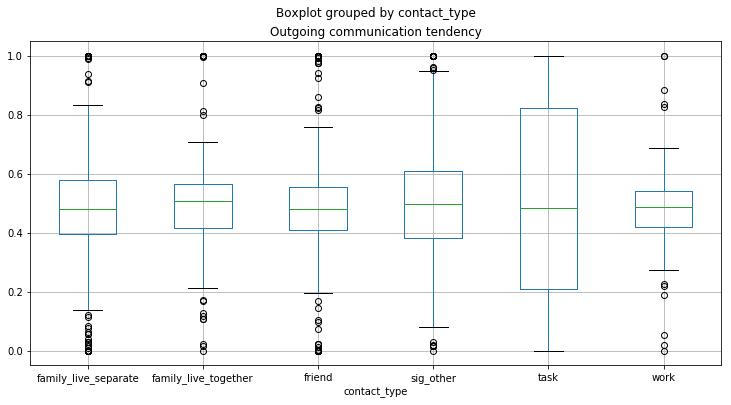

In [19]:
comm_features.boxplot(column='out_comm', by='contact_type')
plt.title("Outgoing communication tendency")
plt.show()

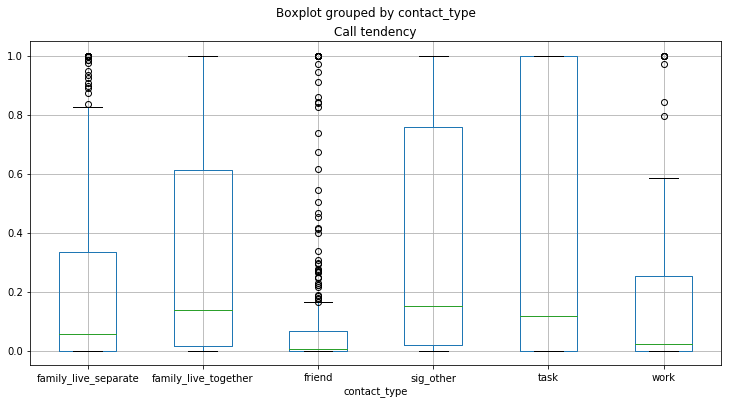

In [20]:
comm_features.boxplot(column='call_tendency', by='contact_type')
plt.title("Call tendency")
plt.show()

# Intensity: mean, std, min, med, max of call, sms, call duration

Features created:
- {mean, std} {out, in} {call, sms} per study day

In [21]:
features = ["mean_in_{}", "std_in_{}", "mean_out_{}", "std_out_{}", "min_in_{}", "max_in_{}", "med_in_{}", "min_out_{}", "max_out_{}", "med_out_{}"]

call_feat_list = [x.format("call") for x in features]
sms_feat_list = [x.format("sms") for x in features]

intensity_sms_mean = sms_features.groupby('contact_type')[sms_feat_list].mean().T
display(intensity_sms_mean)

intensity_call_mean = call_features.groupby('contact_type')[call_feat_list].mean().T
display(intensity_call_mean)

contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
mean_in_sms,1.810,2.642,2.900,6.433,4.236,1.405
std_in_sms,2.857,3.208,4.143,5.385,4.433,2.476
mean_out_sms,1.720,2.768,2.707,6.586,5.406,1.243
std_out_sms,2.783,3.300,3.996,5.982,5.494,2.377
min_in_sms,3.022,2.810,4.670,13.000,6.000,2.900
max_in_sms,26.939,32.786,41.624,68.061,58.220,21.129
med_in_sms,10.314,14.518,17.680,34.606,25.220,9.043
min_out_sms,3.443,3.702,4.040,11.192,8.180,2.829
max_out_sms,25.851,35.476,39.868,73.384,73.520,19.986
med_out_sms,10.279,15.780,16.919,35.556,30.270,8.336


contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
mean_in_call,0.213,0.335,0.140,0.495,0.155,0.231
std_in_call,0.385,0.480,0.272,0.634,0.237,0.472
mean_out_call,0.310,0.499,0.166,0.911,0.229,0.281
std_out_call,0.516,0.722,0.396,1.121,0.585,0.579
min_in_call,0.308,0.388,0.201,0.650,0.439,0.280
max_in_call,3.242,4.400,2.258,5.854,2.158,3.220
med_in_call,1.217,1.565,0.977,2.529,1.184,1.250
min_out_call,0.527,0.565,0.660,1.243,1.789,0.760
max_out_call,4.330,6.365,3.026,10.330,5.158,3.920
med_out_call,1.720,2.382,1.479,4.432,2.658,1.880


In [54]:
call_dur_mean = call_features.groupby('contact_type')[['max_in_duration', 'max_out_duration', 'avg_in_duration', 'avg_out_duration']].mean().T
display(call_dur_mean)

contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
max_in_duration,"2,396.338","1,085.246","2,950.129","2,836.573",896.043,957.567
max_out_duration,"1,794.730",591.413,"1,791.158","1,670.949","1,621.192",981.410
avg_in_duration,676.673,169.401,"1,436.299",456.562,355.171,233.757
avg_out_duration,325.992,88.852,258.787,341.364,207.953,132.280


# Avoidance: missed calls, in/out ratios

Features created:
- `missed_{in, out}_calls`: missed call / {in, out} calls
- `in_out_sms`: in texts / out texts

In [22]:
channel_select_mean = comm_features.groupby('contact_type')[['missed_in_calls', 'missed_out_calls', 'in_out_sms']].mean()
display(channel_select_mean)

,missed_in_calls,missed_out_calls,in_out_sms
contact_type,,,
family_live_separate,0.664,0.407,1.604
family_live_together,0.594,0.347,3.236
friend,0.824,0.491,1.184
sig_other,0.526,0.460,2.695
task,0.531,0.320,2.805
work,0.588,0.552,2.205


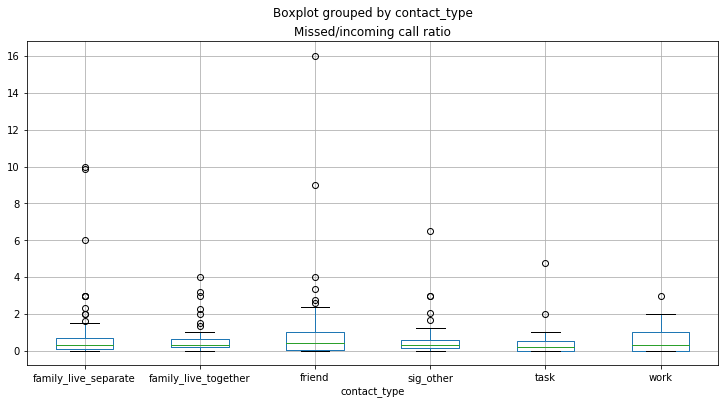

In [23]:
comm_features.boxplot(column='missed_in_calls', by='contact_type')
plt.title("Missed/incoming call ratio")
plt.show()

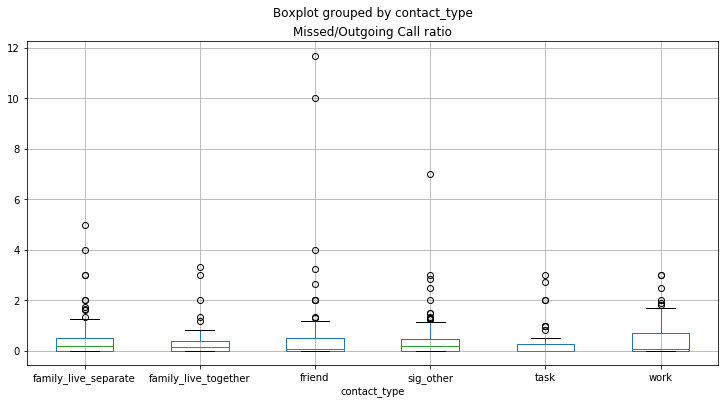

In [24]:
comm_features.boxplot(column='missed_out_calls', by='contact_type')
plt.title("Missed/Outgoing Call ratio")
plt.show()

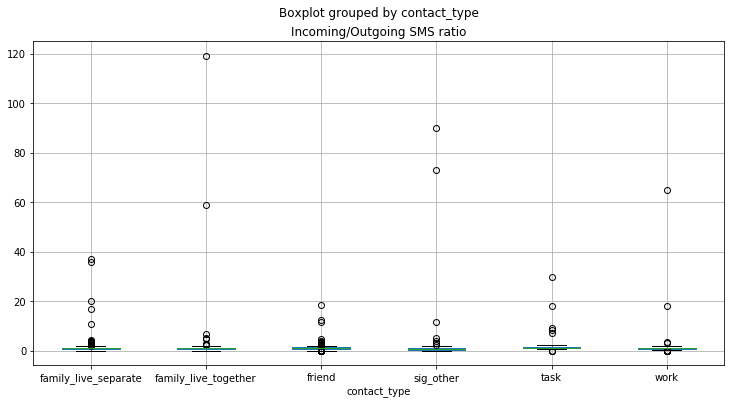

In [25]:
comm_features.boxplot(column='in_out_sms', by='contact_type')
plt.title("Incoming/Outgoing SMS ratio")
plt.show()

# NaN imputation

- NaNs as a result of divide by zeros are filled with zero, with an additional indicator column for the feature

In [26]:
print("Features with NaN values")
display(comm_features.isnull().any())

Features with NaN values


pid                    False
combined_hash          False
total_comms            False
total_comm_days        False
contact_type           False
total_calls            False
total_sms              False
total_sms_days         False
total_call_days        False
total_days             False
reg_call               False
reg_sms                False
reg_comm               False
time_of_day_0_calls     True
time_of_day_1_calls     True
time_of_day_2_calls     True
time_of_day_3_calls     True
time_of_day_4_calls     True
time_of_day_5_calls     True
day_0_calls             True
day_1_calls             True
day_2_calls             True
day_3_calls             True
day_4_calls             True
day_5_calls             True
day_6_calls             True
time_of_day_0_sms       True
time_of_day_1_sms       True
time_of_day_2_sms       True
time_of_day_3_sms       True
                       ...  
day_6_sms               True
mean_in_call            True
std_in_call             True
min_in_call   

In [27]:
comm_features = build_nan_features(comm_features)

# Contact EMA responses

In [28]:
# TODO move into python module
emc_all = pickle.load(open('../data/emc_all.df', 'rb'))
hash_dict = pickle.load(open('../data/emc_to_canonical.dict', 'rb'))
pr_dict = pickle.load(open('../data/pr.dict', 'rb'))

#emc_all = emc_all.reset_index(drop=True)

In [29]:
emc_df = pd.DataFrame()
emc_df = build_emc_features(comm_features, comm_df, emc_all, hash_dict, pr_dict)

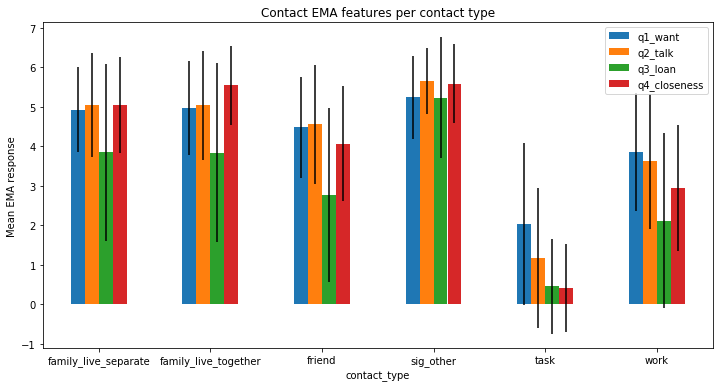

,q1_want,q2_talk,q3_loan,q4_closeness
contact_type,,,,
family_live_separate,4.932,5.049,3.846,5.054
family_live_together,4.971,5.038,3.834,5.552
friend,4.482,4.561,2.765,4.063
sig_other,5.240,5.655,5.231,5.583
task,2.034,1.164,0.450,0.411
work,3.865,3.620,2.120,2.935


,q1_want,q2_talk,q3_loan,q4_closeness
contact_type,,,,
family_live_separate,1.067,1.308,2.235,1.212
family_live_together,1.182,1.381,2.267,1.001
friend,1.278,1.506,2.205,1.459
sig_other,1.044,0.841,1.534,0.999
task,2.062,1.772,1.196,1.111
work,1.492,1.703,2.221,1.592


In [30]:
emc_features = ['q1_want', 'q2_talk', 'q3_loan', 'q4_closeness']
emc_features_mean = emc_df.groupby('contact_type')[emc_features].mean()
emc_features_std = emc_df.groupby('contact_type')[emc_features].std()

emc_features_mean.plot.bar(rot=0, yerr=emc_features_std)
plt.title("Contact EMA features per contact type")
plt.ylabel("Mean EMA response")
plt.show()

display(emc_features_mean)
display(emc_features_std)

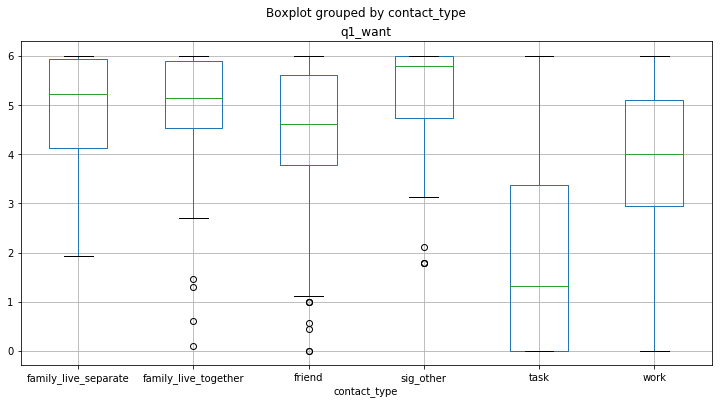

In [31]:
emc_df.boxplot(column='q1_want', by='contact_type')
plt.show()

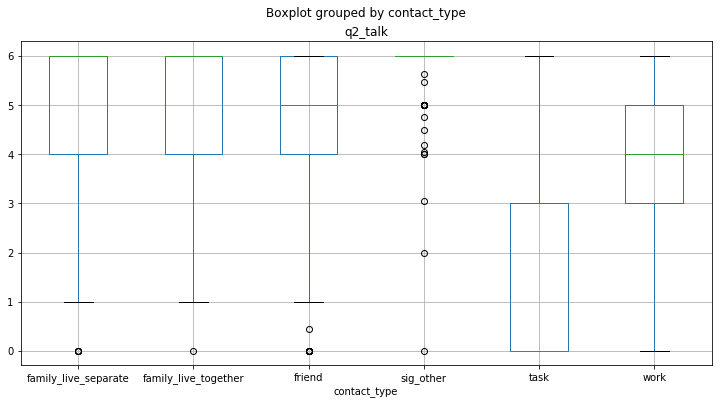

In [32]:
emc_df.boxplot(column='q2_talk', by='contact_type')
plt.show()

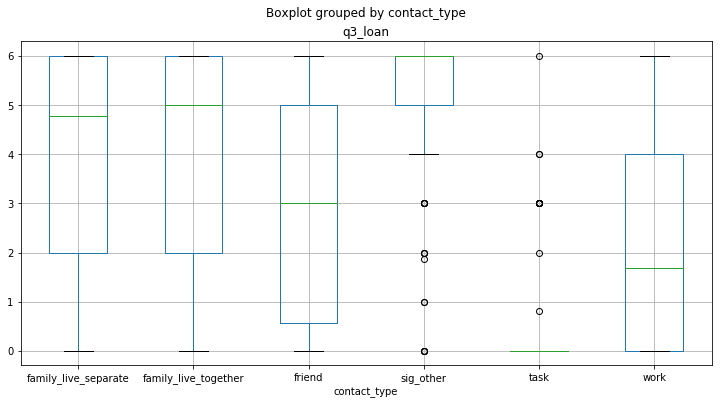

In [33]:
emc_df.boxplot(column='q3_loan', by='contact_type')
plt.show()

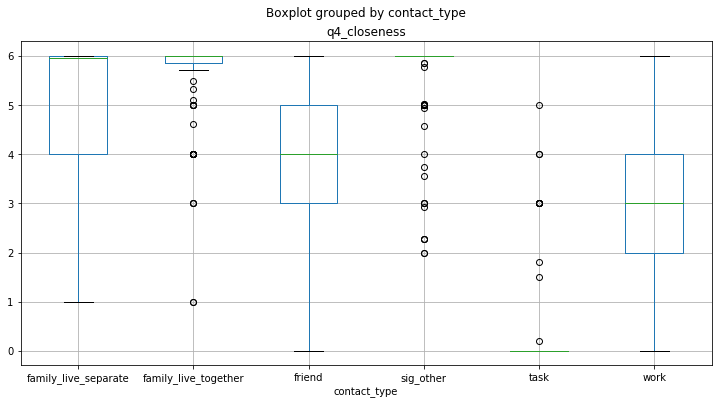

In [34]:
emc_df.boxplot(column='q4_closeness', by='contact_type')
plt.show()

# Demographic features

In [35]:
demo_df = pickle.load(open('../data/demographics.df', 'rb'))
demo_cols = ['pid', 'age', 'gender', 'education', 'employment', 'live_together', 'race', 'ethnicity', 'marital_status']
plt.rcParams["figure.figsize"] = [12,6]

Text(0.5, 0, 'age')

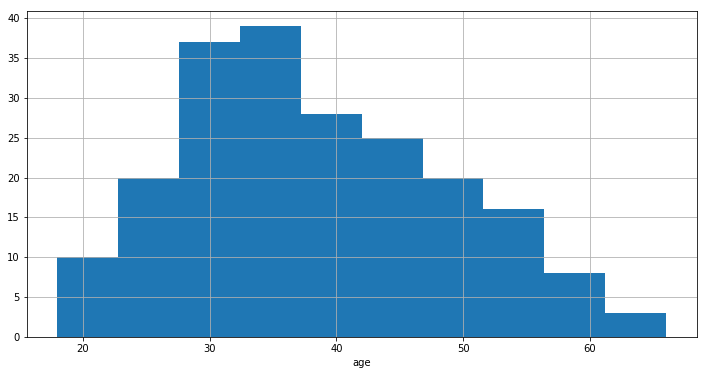

In [36]:
demo_df['age'].hist()
plt.xlabel('age')

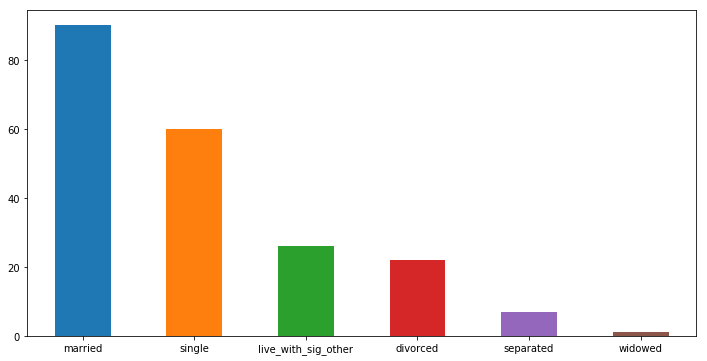

In [37]:
demo_df['marital_status'].value_counts().plot.bar(rot=0)

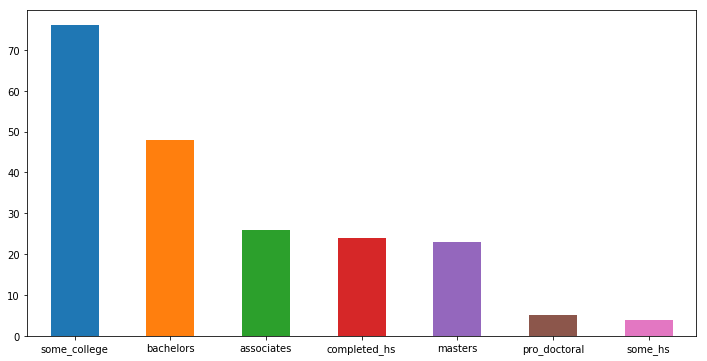

In [38]:
demo_df['education'].value_counts().plot.bar(rot=0)
plt.show()

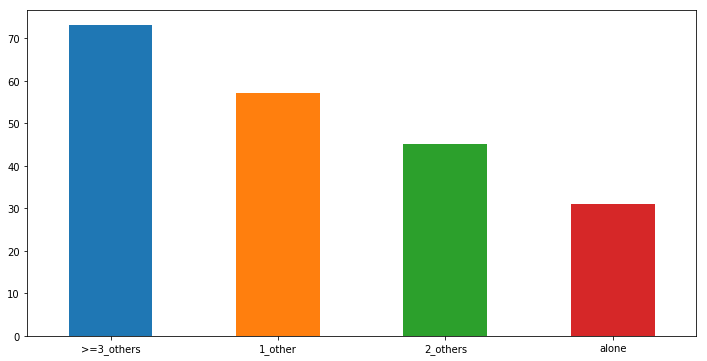

In [39]:
demo_df['live_together'].value_counts().plot.bar(rot=0)

# Semantic location features

In [40]:
loc_df = pickle.load(open('../data/top_10_contacts_loc_final.df', 'rb'))
loc_features = build_location_features(comm_features, loc_df)
plt.rcParams["figure.figsize"] = [15,10]

## SMS tendencies

In [41]:
sms_loc_cols = [x for x in loc_features.columns if x.startswith('sms_loc:')]
sms_visit_cols = [x for x in loc_features.columns if x.startswith('sms_visit_reason:')]

### Locations

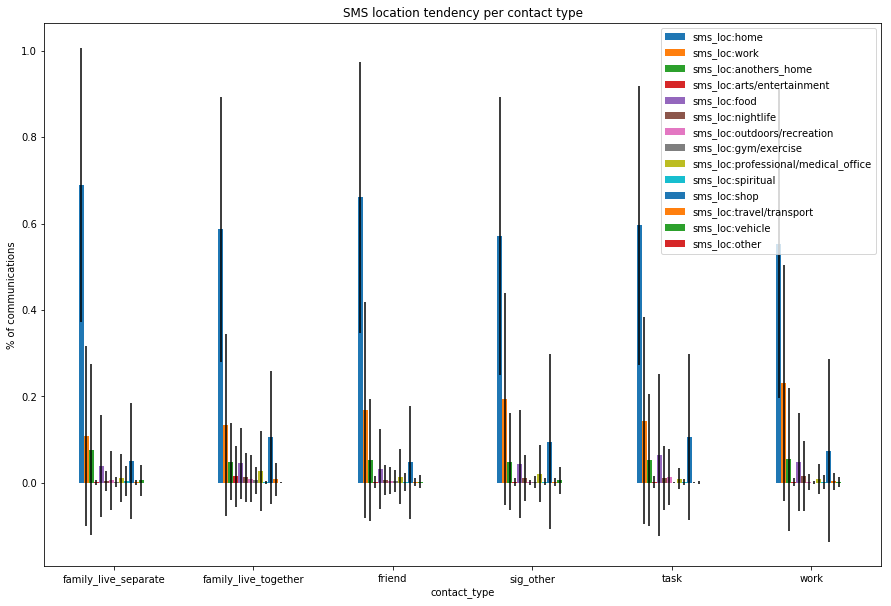

Mean


,sms_loc:home,sms_loc:work,sms_loc:anothers_home,sms_loc:arts/entertainment,sms_loc:food,sms_loc:nightlife,sms_loc:outdoors/recreation,sms_loc:gym/exercise,sms_loc:professional/medical_office,sms_loc:spiritual,sms_loc:shop,sms_loc:travel/transport,sms_loc:vehicle,sms_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.689,0.109,0.077,0.001,0.039,0.004,0.006,0.001,0.011,0.005,0.051,0.001,0.006,0.000
family_live_together,0.586,0.135,0.049,0.015,0.045,0.013,0.010,0.005,0.027,0.001,0.105,0.008,0.000,0.000
friend,0.661,0.168,0.053,0.002,0.032,0.006,0.005,0.004,0.014,0.002,0.048,0.002,0.003,0.000
sig_other,0.572,0.194,0.049,0.002,0.043,0.010,0.001,0.002,0.021,0.002,0.095,0.002,0.006,0.000
task,0.596,0.144,0.052,0.002,0.064,0.011,0.014,0.000,0.010,0.001,0.106,0.000,0.000,0.000
work,0.553,0.231,0.054,0.001,0.049,0.016,0.002,0.001,0.010,0.002,0.075,0.003,0.002,0.000


Std Dev


,sms_loc:home,sms_loc:work,sms_loc:anothers_home,sms_loc:arts/entertainment,sms_loc:food,sms_loc:nightlife,sms_loc:outdoors/recreation,sms_loc:gym/exercise,sms_loc:professional/medical_office,sms_loc:spiritual,sms_loc:shop,sms_loc:travel/transport,sms_loc:vehicle,sms_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.318,0.208,0.197,0.006,0.118,0.024,0.069,0.012,0.056,0.034,0.134,0.006,0.036,0.000
family_live_together,0.307,0.211,0.089,0.071,0.082,0.057,0.054,0.032,0.093,0.004,0.153,0.038,0.002,0.000
friend,0.313,0.250,0.141,0.013,0.092,0.034,0.031,0.026,0.063,0.021,0.131,0.010,0.016,0.000
sig_other,0.323,0.244,0.112,0.009,0.125,0.053,0.006,0.013,0.067,0.008,0.202,0.009,0.031,0.000
task,0.323,0.240,0.153,0.014,0.187,0.074,0.065,0.001,0.025,0.007,0.193,0.001,0.003,0.000
work,0.357,0.274,0.166,0.009,0.113,0.080,0.019,0.004,0.035,0.017,0.211,0.019,0.012,0.000


In [42]:
sms_loc_features_mean = loc_features.groupby('contact_type')[sms_loc_cols].mean()
sms_loc_features_std = loc_features.groupby('contact_type')[sms_loc_cols].std()

sms_loc_features_mean.plot.bar(rot=0, yerr=sms_loc_features_std)
plt.title("SMS location tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(sms_loc_features_mean)
print("Std Dev")
display(sms_loc_features_std)

### Visit Reasons

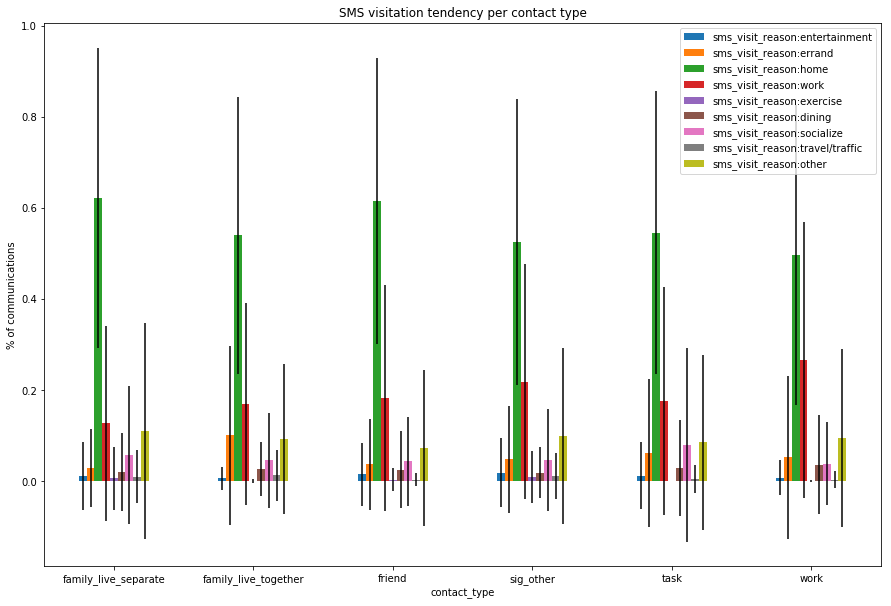

Mean


,sms_visit_reason:entertainment,sms_visit_reason:errand,sms_visit_reason:home,sms_visit_reason:work,sms_visit_reason:exercise,sms_visit_reason:dining,sms_visit_reason:socialize,sms_visit_reason:travel/traffic,sms_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.013,0.030,0.623,0.128,0.007,0.020,0.058,0.011,0.111
family_live_together,0.007,0.101,0.540,0.170,0.001,0.027,0.046,0.013,0.093
friend,0.015,0.037,0.615,0.183,0.004,0.026,0.044,0.004,0.073
sig_other,0.019,0.049,0.526,0.219,0.010,0.019,0.048,0.012,0.100
task,0.013,0.063,0.546,0.177,0.000,0.030,0.081,0.005,0.086
work,0.008,0.053,0.497,0.267,0.000,0.037,0.039,0.003,0.096


Std Dev


,sms_visit_reason:entertainment,sms_visit_reason:errand,sms_visit_reason:home,sms_visit_reason:work,sms_visit_reason:exercise,sms_visit_reason:dining,sms_visit_reason:socialize,sms_visit_reason:travel/traffic,sms_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.074,0.086,0.329,0.214,0.069,0.085,0.152,0.059,0.236
family_live_together,0.025,0.197,0.304,0.222,0.005,0.060,0.104,0.056,0.165
friend,0.069,0.099,0.313,0.247,0.025,0.084,0.097,0.014,0.171
sig_other,0.075,0.117,0.313,0.258,0.058,0.056,0.112,0.051,0.193
task,0.074,0.162,0.311,0.251,0.000,0.105,0.213,0.030,0.192
work,0.039,0.178,0.330,0.303,0.002,0.110,0.091,0.019,0.196


In [43]:
sms_visit_features_mean = loc_features.groupby('contact_type')[sms_visit_cols].mean()
sms_visit_features_std = loc_features.groupby('contact_type')[sms_visit_cols].std()

sms_visit_features_mean.plot.bar(rot=0, yerr=sms_visit_features_std)
plt.title("SMS visitation tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(sms_visit_features_mean)
print("Std Dev")
display(sms_visit_features_std)

## Call tendencies

In [44]:
call_loc_cols = [x for x in loc_features.columns if x.startswith('call_loc:')]
call_visit_cols = [x for x in loc_features.columns if x.startswith('call_visit_reason:')]

### Locations

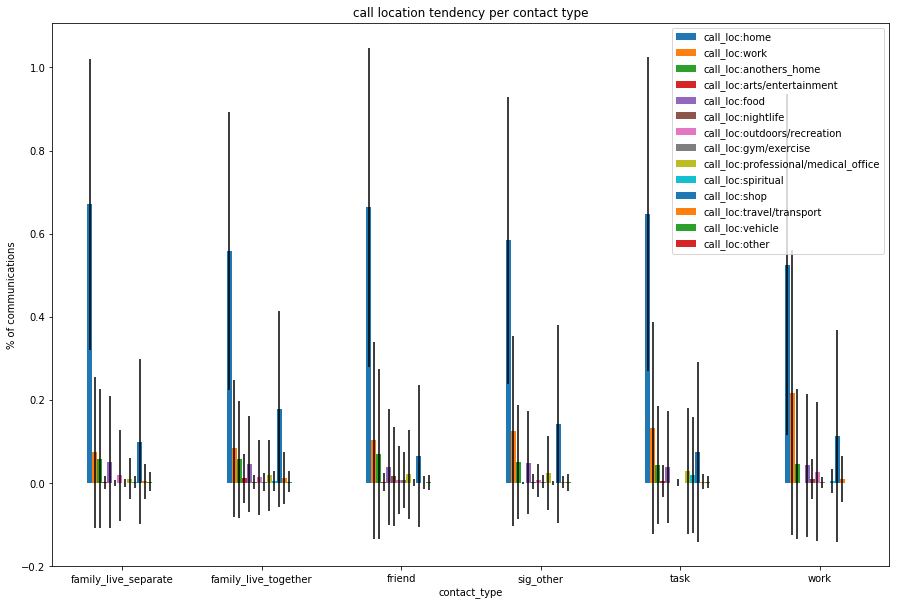

Mean


,call_loc:home,call_loc:work,call_loc:anothers_home,call_loc:arts/entertainment,call_loc:food,call_loc:nightlife,call_loc:outdoors/recreation,call_loc:gym/exercise,call_loc:professional/medical_office,call_loc:spiritual,call_loc:shop,call_loc:travel/transport,call_loc:vehicle,call_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.671,0.074,0.059,0.002,0.051,0.001,0.019,0.001,0.011,0.002,0.100,0.004,0.004,0.000
family_live_together,0.558,0.084,0.058,0.012,0.047,0.003,0.014,0.003,0.019,0.004,0.179,0.013,0.004,0.000
friend,0.664,0.103,0.069,0.002,0.039,0.016,0.008,0.008,0.022,0.001,0.065,0.001,0.002,0.000
sig_other,0.584,0.125,0.051,0.000,0.050,0.003,0.007,0.003,0.025,0.001,0.143,0.003,0.002,0.000
task,0.648,0.133,0.043,0.005,0.039,0.000,0.001,0.000,0.029,0.020,0.075,0.004,0.002,0.000
work,0.526,0.217,0.047,0.000,0.043,0.009,0.028,0.002,0.000,0.005,0.114,0.009,0.000,0.000


Std Dev


,call_loc:home,call_loc:work,call_loc:anothers_home,call_loc:arts/entertainment,call_loc:food,call_loc:nightlife,call_loc:outdoors/recreation,call_loc:gym/exercise,call_loc:professional/medical_office,call_loc:spiritual,call_loc:shop,call_loc:travel/transport,call_loc:vehicle,call_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.350,0.181,0.167,0.015,0.159,0.007,0.109,0.009,0.050,0.014,0.198,0.042,0.023,0.000
family_live_together,0.334,0.165,0.141,0.059,0.116,0.018,0.090,0.022,0.086,0.024,0.236,0.062,0.024,0.000
friend,0.384,0.236,0.204,0.022,0.139,0.118,0.082,0.068,0.107,0.008,0.171,0.016,0.018,0.000
sig_other,0.345,0.228,0.137,0.003,0.123,0.018,0.039,0.016,0.089,0.005,0.238,0.014,0.020,0.000
task,0.377,0.255,0.142,0.038,0.134,0.000,0.009,0.000,0.151,0.140,0.216,0.019,0.015,0.000
work,0.411,0.343,0.180,0.000,0.172,0.048,0.167,0.013,0.000,0.029,0.255,0.056,0.000,0.000


In [45]:
call_loc_features_mean = loc_features.groupby('contact_type')[call_loc_cols].mean()
call_loc_features_std = loc_features.groupby('contact_type')[call_loc_cols].std()

call_loc_features_mean.plot.bar(rot=0, yerr=call_loc_features_std)
plt.title("call location tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(call_loc_features_mean)
print("Std Dev")
display(call_loc_features_std)

### Visit Reasons

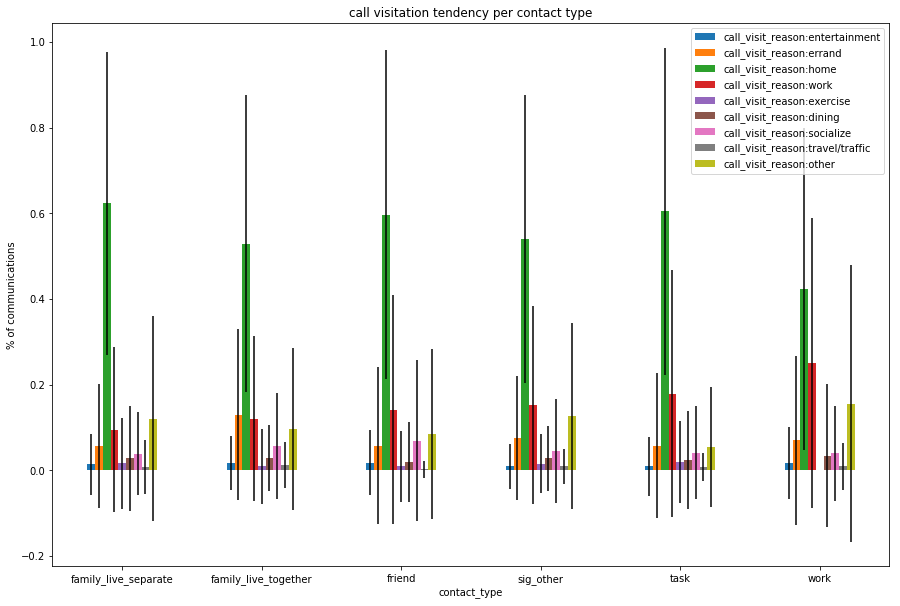

Mean


,call_visit_reason:entertainment,call_visit_reason:errand,call_visit_reason:home,call_visit_reason:work,call_visit_reason:exercise,call_visit_reason:dining,call_visit_reason:socialize,call_visit_reason:travel/traffic,call_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.014,0.057,0.623,0.095,0.016,0.028,0.039,0.008,0.120
family_live_together,0.017,0.130,0.529,0.121,0.010,0.028,0.057,0.011,0.097
friend,0.018,0.058,0.597,0.142,0.009,0.019,0.069,0.002,0.085
sig_other,0.009,0.075,0.540,0.152,0.015,0.028,0.044,0.009,0.127
task,0.010,0.058,0.605,0.179,0.020,0.025,0.042,0.007,0.055
work,0.017,0.070,0.423,0.251,0.000,0.034,0.040,0.009,0.156


Std Dev


,call_visit_reason:entertainment,call_visit_reason:errand,call_visit_reason:home,call_visit_reason:work,call_visit_reason:exercise,call_visit_reason:dining,call_visit_reason:socialize,call_visit_reason:travel/traffic,call_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.070,0.146,0.355,0.192,0.107,0.123,0.096,0.063,0.240
family_live_together,0.063,0.199,0.347,0.193,0.087,0.078,0.124,0.054,0.189
friend,0.077,0.184,0.384,0.268,0.084,0.093,0.187,0.020,0.198
sig_other,0.052,0.145,0.336,0.231,0.069,0.076,0.122,0.040,0.218
task,0.069,0.169,0.382,0.289,0.095,0.115,0.109,0.033,0.141
work,0.085,0.198,0.377,0.339,0.000,0.167,0.112,0.054,0.323


In [46]:
call_visit_features_mean = loc_features.groupby('contact_type')[call_visit_cols].mean()
call_visit_features_std = loc_features.groupby('contact_type')[call_visit_cols].std()

call_visit_features_mean.plot.bar(rot=0, yerr=call_visit_features_std)
plt.title("call visitation tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(call_visit_features_mean)
print("Std Dev")
display(call_visit_features_std)

# Sandbox

In [47]:
labels, bins = pd.qcut(emc_df['q1_want'], 3, retbins=True)

In [48]:
labels

0         (5.571, 6.0]
1         (5.571, 6.0]
2      (-0.001, 4.095]
3         (5.571, 6.0]
4         (5.571, 6.0]
5       (4.095, 5.571]
6         (5.571, 6.0]
7         (5.571, 6.0]
8       (4.095, 5.571]
9         (5.571, 6.0]
10        (5.571, 6.0]
11     (-0.001, 4.095]
12        (5.571, 6.0]
13        (5.571, 6.0]
14        (5.571, 6.0]
15        (5.571, 6.0]
16      (4.095, 5.571]
17        (5.571, 6.0]
18     (-0.001, 4.095]
19        (5.571, 6.0]
20     (-0.001, 4.095]
21      (4.095, 5.571]
22      (4.095, 5.571]
23     (-0.001, 4.095]
24      (4.095, 5.571]
25        (5.571, 6.0]
26     (-0.001, 4.095]
27        (5.571, 6.0]
28     (-0.001, 4.095]
29        (5.571, 6.0]
            ...       
915    (-0.001, 4.095]
916       (5.571, 6.0]
917    (-0.001, 4.095]
918       (5.571, 6.0]
919       (5.571, 6.0]
920     (4.095, 5.571]
921     (4.095, 5.571]
922     (4.095, 5.571]
923     (4.095, 5.571]
924     (4.095, 5.571]
925     (4.095, 5.571]
926       (5.571, 6.0]
927     (4.

In [49]:
bins[0] -= 0.001

In [50]:
bins

array([-1.00000000e-03,  4.09523810e+00,  5.57142857e+00,  6.00000000e+00])

In [51]:
emc_df.loc[pd.cut(emc_df['q1_want'], bins, labels=False).isna(), 'q1_want']

Series([], Name: q1_want, dtype: float64)

In [52]:
4.2 - 1.8

2.4000000000000004